# Primer library generation for deep mutational scanning

In [12]:
import os
import re

from importlib import reload
from itertools import compress

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# BioPython imports
import Bio
from Bio.Seq import Seq
from Bio.Data import CodonTable
from Bio.SeqUtils import MeltingTemp as mt

import Levenshtein

import spikedisplay
from spikedisplay import plotting, constants, library

plotting.set_styles(plt, matplotlib)

font.sans-serif Arial
mathtext.default regular


## Links

[Bloom script on github](https://github.com/jbloomlab/CodonTilingPrimers)

[Tyler Starr's adapted version of Jesse's script](https://github.com/jbloomlab/SARS-CoV-2-RBD_DMS/blob/master/data/primers/mutational_lib/create_NNSprimers_py3.py)

[Saturation mutagenesis from Whitehead lab](https://pubmed.ncbi.nlm.nih.gov/27723752/)

## 1. Generate library using Jesse Blooms' script

Define parameters for where to read and write files, max and minimum primer Tm. Also, the script **only generates primers to mutagenize upper case sequence, the surrounding lower case is ignored and used for primer annealing. `firstcodon` defines which codon in the upper case section to start on**.

Note that `spikedisplay.library.annotate_NNN_primers()` similarly defines the ORF as upper case characters found in the file at `sequence_file_path` 

Make sure that any .txt files containing sequences you want to mutagenize are in the same directory as this notebook

In [36]:
# Define argument variables
script_path = 'create_primers.py'
input_path = 'Spike_NTD_1.txt'
primerprefix = 'NTD1'
firstcodon = 1
maxtm = 61
mintm = 59
filename = input_path.replace('.txt', '')
output_path = f'{filename}_primers_tm_{mintm}-{maxtm}.txt'
# Run the script using argument variables defined above
!python $script_path $input_path $primerprefix $firstcodon $output_path --minprimertm $mintm --maxprimertm $maxtm

Read the following command line arguments
	sequencefile = Spike_NTD_1.txt
	primerprefix = NTD1
	firstcodon = 1
	outfile = Spike_NTD_1_primers_tm_59-61.txt
	startprimerlength = 37
	maxprimertm = 61.0
	minprimertm = 59.0
	minlength = 25
	maxlength = 51
	ambiguous_codon = NNN
	output = plates
Read a sequence of length 399 from Spike_NTD_1.txt:
tgcgttatcccctgattctgtggataaccgtagcctcagcctgtgggtcggcacctgccaccatgttcGTGTTCCTGGTGCTCCTGCCTCTGGTGAGCAGCCAGTGCGTGAACCTGACCACCCGAACCCAGCTCCCACCAGCCTACACCAACAGCTTTACACGGGGCGTGTACTACCCTGACAAGGTGTTCAGATCTAGCGTCCTGCACAGCACTCAGGACCTCTTCCTGCCGTTCTTCAGCAACGTGACATGGTTCCACGCCATCCACGTGAGCGGCACAAACGGAACCAAGCGGTTTGATAACCCCGTCCTGCCATTCAATGATGGAGTTTACTTCgccagggtggcaggtggaccagaccaataaaaaacgcccggcggcaaccgagcgttctgaa
The primers will be named with the prefix NTD1, and the first codon numbered as 1.
Designed 90 mutation forward primers.
Designed 90 mutation reverse primers.
This gives a total of 180 primers.

Now writing these primers to Spike_NTD_1_primers_tm_59-61.txt


## 2. Read in the NNN library from above, drop reverse primers and annotate with melt temp, WT codon etc.

In [37]:
primer_df = library.clean_NNN_primers(output_path)
primer_df = library.annotate_NNN_primers(primer_df, sequence_file_path=input_path)

### Quick check to see if generated NNN library has expected range of melt temps

Note that this melt temp is calculated using `Bio.SeqUtils.MeltingTemp.Tm_NN` which assumes average melt temp for N bases. When `Tm_real` is calculated between the actual oligo library and WT sequence, `Bio.SeqUtils.MeltingTemp.Tm_GC` is used

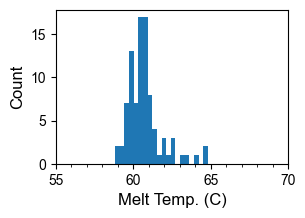

In [38]:
fig = plt.figure(figsize=(3, 2))
fig.set_dpi(100)
ax = fig.add_subplot(111)
mts = primer_df.Tm_NN
ax.hist(mts, bins=20)

ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Melt Temp. (C)', fontsize=12)

ax.set_xlim(55, 70)
ax.set_xticks(np.arange(55, 71, 1), minor=True)
plt.show()

## 3. Generate pooled oligo libraries using `library.generate_library()`

### Generate first library using best codon found for each position

In [39]:
reload(library)

<module 'spikedisplay.library' from 'C:\\Users\\johnp\\Dropbox\\Projects\\spikedisplay\\spikedisplay\\library.py'>

In [40]:
kwargs = {'rank_to_select': 0,
          'keep_wt': False,
          'return_dfs': True,
          'mismatch_weight': 0.5,
          'usage_weight': 6}

library_df0, preselection_library_df0 = library.generate_library(primer_df, **kwargs)

Finding alternative codons for primer number 0
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 0
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 1
Evaluating codons for amino acid F
Evalu

Finding alternative codons for primer number 10
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 10
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 11
Evaluating codons for amino acid F
Ev

Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 20
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 20
Found BsmBI cut sit in primer
Found BsmBI cut sit in primer
Found BsaI cut sit in pri

Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 29
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 30
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codo

Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 38
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 39
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codo

Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 48
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 48
Selected 20 primers for this site with rank 0
Finding alternative codons for primer n

Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 58
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 59
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codo

Finding alternative codons for primer number 68
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 68
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 69
Evaluating codons for amino acid F
Ev

Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 77
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 78
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codo

Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 87
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 88
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codo

### Generate second library using second best codon found for each codon

In [43]:
kwargs = {'rank_to_select': 1,
          'keep_wt': False,
          'return_dfs': True,
          'mismatch_weight': 0.5,
          'usage_weight': 6}

second_library_df, second_preselection_library_df = library.generate_library(primer_df,
                                                                             **kwargs)

Finding alternative codons for primer number 0
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 0
Selected 20 primers for this site with rank 1
Finding alternative codons for primer number 1
Evaluating codons for amino acid F
Evalu

Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 9
Selected 20 primers for this site with rank 1
Finding alternative codons for primer number 10
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codon


Evaluated codons of 20 amino acids for primer number 19
Found BsaI cut sit in primer
Found BsaI cut sit in primer
Selected 20 primers for this site with rank 1
Finding alternative codons for primer number 20
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 ami

Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 29
Selected 20 primers for this site with rank 1
Finding alternative codons for primer number 30
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codo

Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 39
Selected 20 primers for this site with rank 1
Finding alternative codons for primer number 40
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codo

Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 49
Found BsaI cut sit in primer
Found BsaI cut sit in primer
Found BsaI cut sit in primer
Found BsaI cut sit in primer
Found BsaI cut sit in primer
Found BsaI cut sit in primer
Selected 20 primers for this site with rank 1
Finding alternative codons fo

Selected 20 primers for this site with rank 1
Finding alternative codons for primer number 58
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 58
Selected 20 primers for this site with rank 1
Finding alternative codons for primer n

Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 67
Selected 20 primers for this site with rank 1
Finding alternative codons for primer number 68
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codo

Finding alternative codons for primer number 76
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 76
Selected 20 primers for this site with rank 1
Finding alternative codons for primer number 77
Evaluating codons for amino acid F
Ev

Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 85
Selected 20 primers for this site with rank 1
Finding alternative codons for primer number 86
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codo

# Supplemental Materials

## Scan mismatch and usage weights

In [44]:
usage_weights = np.arange(0, 10, 1)
usage_weights = [0, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9]

library_dfs = []
for weight in usage_weights:
    print(f'Making library with codon usage weight {weight}')
    kwargs = {'rank_to_select': 0,
              'keep_wt': False,
              'return_dfs': True,
              'mismatch_weight': 0.5,
              'usage_weight': weight}

    library_df, preselection_df = library.generate_library(primer_df, **kwargs)
    library_dfs.append(library_df)

alldf = pd.concat(library_dfs, ignore_index=True)
combined_weights = alldf['mismatch_weight'].astype(str) + '-' + alldf['codon_usage_weight'].astype(str)
alldf.loc[:, 'mismatch_weight-usage_weight'] = combined_weights

Making library with codon usage weight 0
Finding alternative codons for primer number 0
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 0
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 1

Finding alternative codons for primer number 9
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 9
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 10
Evaluating codons for amino acid F
Eval

Finding alternative codons for primer number 18
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 18
Found BsaI cut sit in primer
Found BsaI cut sit in primer
Found AaRI cut sit in primer
Found AaRI cut sit in primer
Selected 20 pri

Finding alternative codons for primer number 27
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 27
Found AaRI cut sit in primer
Found AaRI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons 

Finding alternative codons for primer number 36
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 36
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 37
Evaluating codons for amino acid F
Ev

Finding alternative codons for primer number 45
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 45
Found BsmBI cut sit in primer
Found BsmBI cut sit in primer
Found BsmBI cut sit in primer
Found BsmBI cut sit in primer
Found BsmBI

Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 54
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 55
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codo

Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 64
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 65
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codo

Finding alternative codons for primer number 74
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 74
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 75
Evaluating codons for amino acid F
Ev

Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 83
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 84
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codo

Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 3
Found BsmBI cut sit in primer
Found BsmBI cut sit in primer
Found BsaI cut sit in primer
Found BsaI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 4
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Eval

Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 13
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 13
Selected 20 primers for this site with rank 0
Finding alternative codons for primer n

Found BsaI cut sit in primer
Found BsaI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 22
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 22
Selected 20 primers for thi

Finding alternative codons for primer number 31
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 31
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 32
Evaluating codons for amino acid F
Ev

Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 40
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 41
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codo

Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 49
Found BsaI cut sit in primer
Found BsaI cut sit in primer
Found BsaI cut sit in primer
Found BsaI cut sit in primer
Found BsaI cut sit in primer
Found BsaI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 50
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codon

Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 58
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 59
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codo

Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 68
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 69
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer num

Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 78
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 79
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codo

Finding alternative codons for primer number 88
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 88
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 89
Evaluating codons for amino acid F
Ev

Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 6
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 7
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon fo

Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 16
Found BsaI cut sit in primer
Found BsaI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 17
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino

Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 25
Found BsaI cut sit in primer
Found BsaI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 26
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino

Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 34
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 35
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons 

Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 43
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 44
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon 

Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 52
Found AaRI cut sit in primer
Found AaRI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 53
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino

Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 61
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 62
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codo

Found NotI cut sit in primer
Found NotI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 71
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 71
Selected 20 primers for thi

Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 80
Found AaRI cut sit in primer
Found AaRI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 81
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino

Saved primer library at C:\Users\johnp\Dropbox\Projects\spikedisplay\NTD1_rank-0_usage-weight-1_mismatch-weight-0.5_oligo_library_no-WT_1638915326.783836.csv
Making library with codon usage weight 2
Finding alternative codons for primer number 0
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for ami

Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 9
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 10
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codon

Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 18
Found BsaI cut sit in primer
Found BsaI cut sit in primer
Found AaRI cut sit in primer
Found AaRI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 19
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Eval

Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 27
Found AaRI cut sit in primer
Found AaRI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 28
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino

Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 36
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 37
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codo

Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 45
Found BsmBI cut sit in primer
Found BsmBI cut sit in primer
Found BsmBI cut sit in primer
Found BsmBI cut sit in primer
Found BsmBI cut sit in primer
Found BsmBI cut sit in primer
Found BsmBI cut sit in primer
Found BsmBI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 46
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons

Finding alternative codons for primer number 55
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 55
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 56
Evaluating codons for amino acid F
Ev

Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 64
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 65
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codo

Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 73
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 74
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codo

Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 82
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 83
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons 

Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 1
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 2
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons

Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 10
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 11
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codo

Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 19
Found BsaI cut sit in primer
Found BsaI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 20
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino

Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 29
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 30
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codo

Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 38
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 39
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer num

Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 47
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 48
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codo

Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 56
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 57
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codo

Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 66
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 67
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codo

Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 75
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 76
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codo

Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 84
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 85
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codo

Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 4
Found AaRI cut sit in primer
Found AaRI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 5
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino a

Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 13
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 14
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons 

Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 22
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 23
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codo

Finding alternative codons for primer number 32
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 32
Found AaRI cut sit in primer
Found AaRI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons 

Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 41
Found BsmBI cut sit in primer
Found BsmBI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 42
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for ami

Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 50
Found BsmBI cut sit in primer
Found BsmBI cut sit in primer
Found BsaI cut sit in primer
Found BsaI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 51
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W

Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 59
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 60
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codo

Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 68
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 69
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codo

Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 77
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 78
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codo

Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 87
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 88
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codo

Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 7
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 8
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons

Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 16
Found BsaI cut sit in primer
Found BsaI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 17
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino

Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 25
Found BsaI cut sit in primer
Found BsaI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 26
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino

Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 34
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 35
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons 

Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 43
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 44
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codo

Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 52
Found AaRI cut sit in primer
Found AaRI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 53
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino

Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 62
Found BsaI cut sit in primer
Found BsaI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 63
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino

Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 71
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 72
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codo

Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 80
Found AaRI cut sit in primer
Found AaRI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 81
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino

Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 89
Selected 20 primers for this site with rank 0
Dropping codons for WT amino acids
Saved primer library at C:\Users\johnp\Dropbox\Projects\spikedisplay\NTD1_rank-0_usage-weight-5_mismatch-weight-0.5_oligo_library_no-WT_1638915374.990428.csv
Making library with codon usage weight 6
Finding alternative codons for primer number 0
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for am

Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 9
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 10
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon f

Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 18
Found BsaI cut sit in primer
Found BsaI cut sit in primer
Found AaRI cut sit in primer
Found AaRI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 19
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Eval

Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 27
Found AaRI cut sit in primer
Found AaRI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 28
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino

Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 36
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 37
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codo

Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 45
Found BsmBI cut sit in primer
Found BsmBI cut sit in primer
Found BsmBI cut sit in primer
Found BsmBI cut sit in primer
Found BsmBI cut sit in primer
Found BsmBI cut sit in primer
Found BsmBI cut sit in primer
Found BsmBI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 46
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons

Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 55
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 56
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codo

Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 64
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 65
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codo

Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 73
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 74
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codo

Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 82
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 83
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons 

Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 1
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 2
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons

Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 10
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 11
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codo

Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 20
Found BsmBI cut sit in primer
Found BsmBI cut sit in primer
Found BsaI cut sit in primer
Found BsaI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 21
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M

Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 29
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 30
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codo

Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 39
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 39
Selected 20 primers for this site with rank 0
Finding alternative codons for primer n

Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 48
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 49
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codo

Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 57
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 58
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon 

Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 66
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 67
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codo

Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 75
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 76
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codo

Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 84
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 85
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codo

Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 4
Found AaRI cut sit in primer
Found AaRI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 5
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino a

Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 14
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 15
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codo

Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 23
Found AaRI cut sit in primer
Found AaRI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 24
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino

Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 32
Found AaRI cut sit in primer
Found AaRI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 33
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino

Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 41
Found BsmBI cut sit in primer
Found BsmBI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 42
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for ami

Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 50
Found BsmBI cut sit in primer
Found BsmBI cut sit in primer
Found BsaI cut sit in primer
Found BsaI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 51
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Ev

Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 60
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 60
Selected 20 primers for this site with rank 0
Finding alternative codons for primer n

Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 69
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 70
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codo

Finding alternative codons for primer number 78
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 78
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 79
Evaluating codons for amino acid F
Ev

Finding alternative codons for primer number 87
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 87
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 88
Evaluating codons for amino acid F
Ev

Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 6
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 6
Selected 20 primers for this site with rank 0
Finding alternative codons for primer num

Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 15
Found BsaI cut sit in primer
Found BsaI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 16
Evaluating codons for amino acid F
Evaluating codons for amino

Finding alternative codons for primer number 24
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 24
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 25
Evaluating codons for amino acid F
Ev

Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 33
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 34
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codo

Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 42
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 43
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codo

Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 51
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 52
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon 

Finding alternative codons for primer number 61
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 61
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 62
Evaluating codons for amino acid F
Ev

Finding alternative codons for primer number 70
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 70
Found NotI cut sit in primer
Found NotI cut sit in primer
Selected 20 primers for this site with rank 0
Finding alternative codons 

Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 79
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 80
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codo

Finding alternative codons for primer number 88
Evaluating codons for amino acid F
Evaluating codons for amino acid L
Evaluating codons for amino acid Y
Evaluating codons for amino acid H
Evaluating codons for amino acid Q
Evaluating codons for amino acid I
Evaluating codons for amino acid M
Only one codon for amino acid M
Evaluating codons for amino acid N
Evaluating codons for amino acid K
Evaluating codons for amino acid V
Evaluating codons for amino acid D
Evaluating codons for amino acid E
Evaluating codons for amino acid S
Evaluating codons for amino acid C
Evaluating codons for amino acid W
Only one codon for amino acid W
Evaluating codons for amino acid P
Evaluating codons for amino acid R
Evaluating codons for amino acid T
Evaluating codons for amino acid A
Evaluating codons for amino acid G

Evaluated codons of 20 amino acids for primer number 88
Selected 20 primers for this site with rank 0
Finding alternative codons for primer number 89
Evaluating codons for amino acid F
Ev

No handles with labels found to put in legend.
No handles with labels found to put in legend.


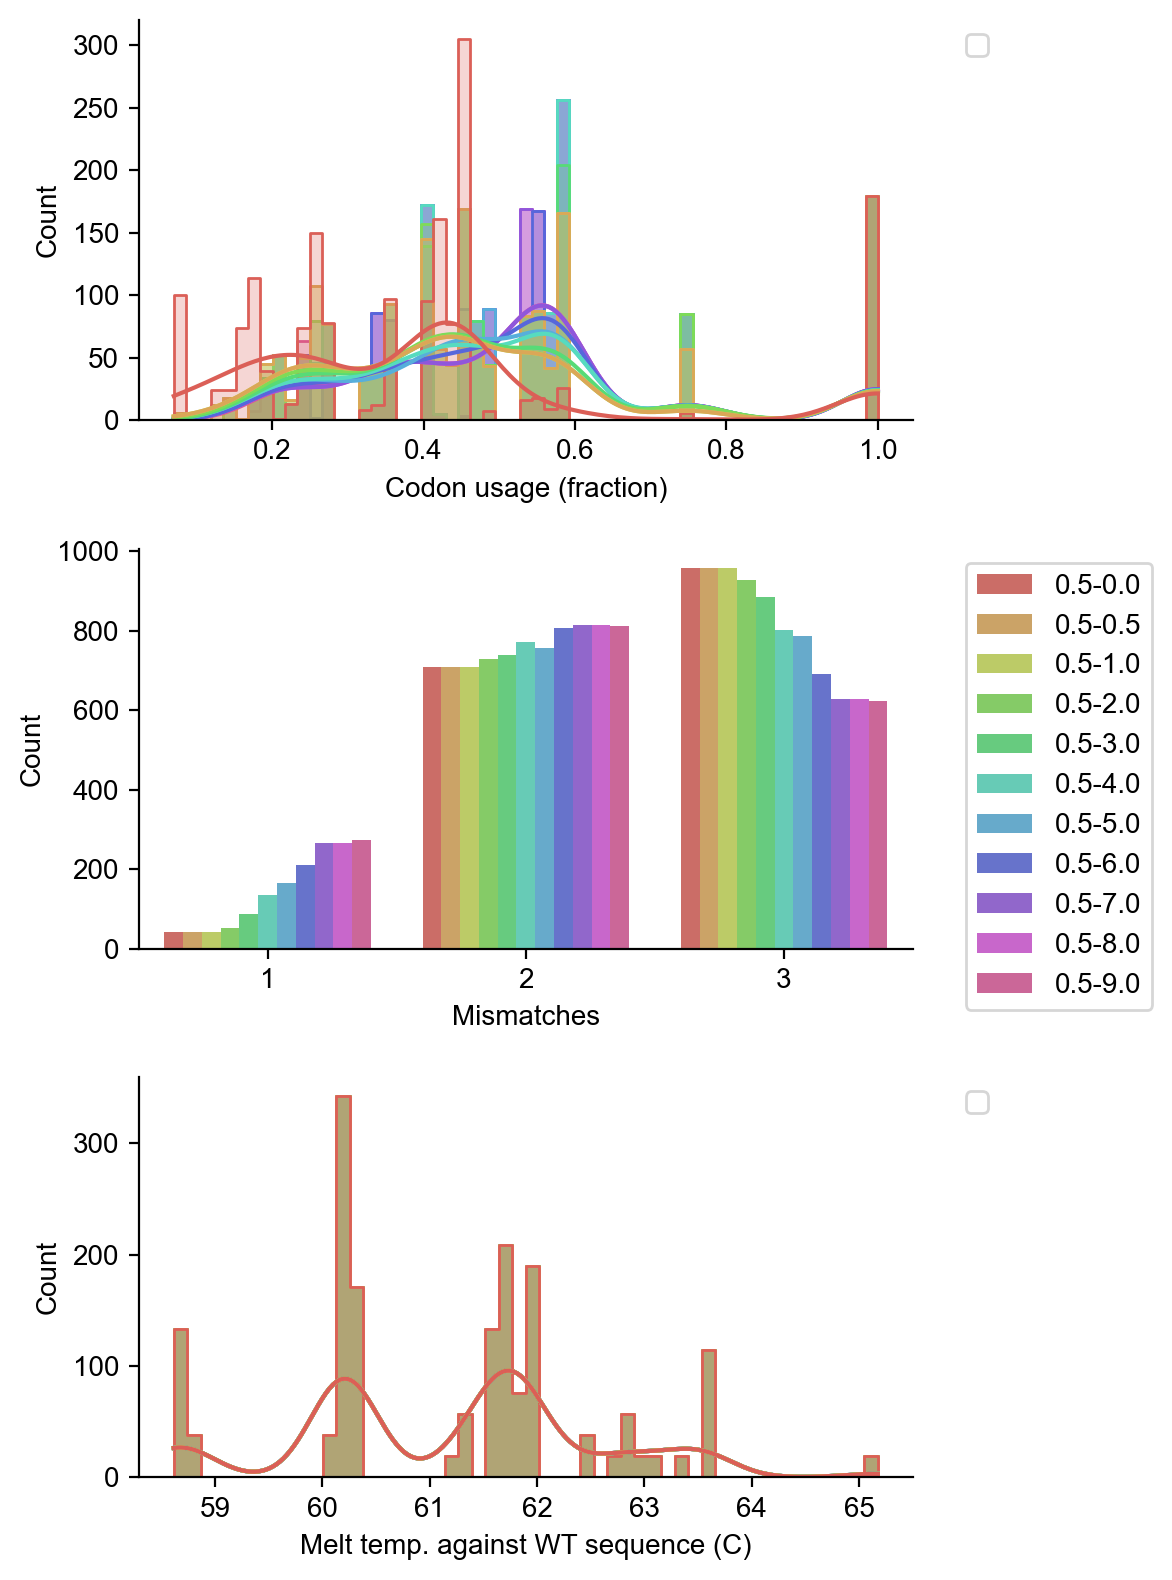

In [45]:
fig = plt.figure(figsize=(6, 8))
fig.set_dpi(200)

n_colors = len(alldf['mismatch_weight-usage_weight'].unique())
palette = sns.color_palette('hls', n_colors)

histkwargs = {'hue': 'mismatch_weight-usage_weight',
              'data': alldf,
              'element': 'step',
              'kde': True,
              'palette': palette}

countkwargs = {'hue': 'mismatch_weight-usage_weight',
              'data': alldf,
              'palette': palette}

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
xlabels = ['Codon usage (fraction)',
           'Mismatches',
           'Melt temp. against WT sequence (C)']
axs = [ax1, ax2, ax3]
# Plot codon usage
sns.histplot(x='fraction', **histkwargs, ax=ax1)
# Plot mismatches
sns.countplot(x='levenshtein_dist', **countkwargs, ax=ax2)
# Plot melt temp
sns.histplot(x='Tm_real', **histkwargs, ax=ax3)


for i, ax in enumerate(axs):
    ax.set_xlabel(xlabels[i])
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_ylabel('Count')
    for n in ['top', 'right']:
        ax.spines[n].set_visible(False)
plt.tight_layout()

Text(0.5, 0, 'Codon usage weight (mismatch weight 0.5)')

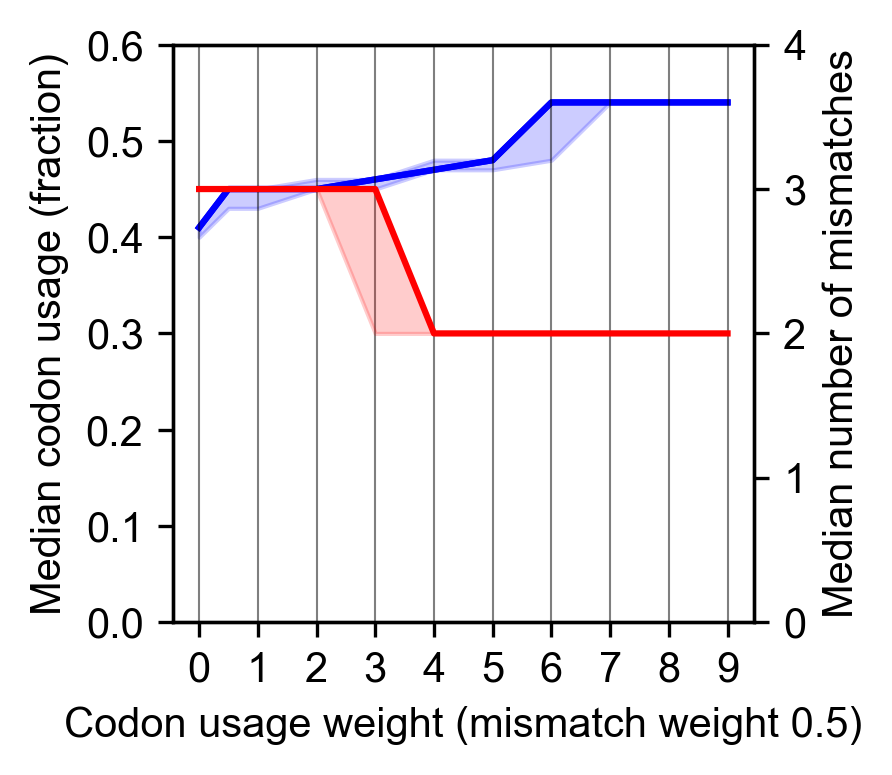

In [47]:
table = alldf.pivot_table(index=['mismatch_weight-usage_weight'], aggfunc='median')
table.reset_index(inplace=True)

fig = plt.figure(figsize=(2.5, 2.5))
fig.set_dpi(300)
ax = fig.add_subplot(111)

ax.plot(table.codon_usage_weight, table.fraction, color='blue')
sns.lineplot(x='codon_usage_weight', y='fraction', data=alldf,
             estimator=np.median, color='blue', ax=ax)
ax.set_ylim(0, 0.6)
ax.set_xticks(np.arange(0, 10, 1))

for t in ax.get_xticks():
    ax.axvline(t, color='black', linewidth='0.5', alpha=0.5)

ax2 = ax.twinx()
ax2.set_ylim(0, 4)
sns.lineplot(x='codon_usage_weight', y='levenshtein_dist', data=alldf,
             estimator=np.median, color='red', ax=ax2)

ax.set_ylabel('Median codon usage (fraction)')
ax2.set_ylabel('Median number of mismatches')
ax.set_xlabel('Codon usage weight (mismatch weight 0.5)')

### Implementing restriction site screening

In [2]:
import os
import re

from importlib import reload
from itertools import compress

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# BioPython imports
import Bio
from Bio.Seq import Seq
from Bio.Data import CodonTable
from Bio.SeqUtils import MeltingTemp as mt

import Levenshtein

import spikedisplay
from spikedisplay import plotting, constants, library

plotting.set_styles(plt, matplotlib)

font.sans-serif Arial
mathtext.default regular


In [27]:
path = os.path.join(constants.source_path, 'RBD_rank-0_oligo_library_no-WT_1628704286.574602.csv')
df = pd.read_csv(path)

primer_seq = df.primer_new[1]
rev_comp = str(Seq(primer_seq).reverse_complement())

In [39]:
primer_seq = 'TCAGCGGGTCGGTCTCCTC'
screen_cut_sites(primer_seq)

BsmBI: CGTCTC
BsaI: GGTCTC
Found BsaI cut sit in primer
AaRI: CACCTGC
NotI: GCGGCCGC


True

In [8]:
primer_seq

' tcgtgcgatttccaTTTATTACCAACCTCTG'